# Report
Parallel computing, [lab1](https://github.com/Drapegnik/bsu/tree/master/parallel-computing/lab1) by [Ivan Pazhitnykh](https://github.com/Drapegnik)

## task
*Исследование влияния размера матриц и блоков на время реализации блочного алгоритма перемножения матриц на многоядерном `CPU`*

1. Программно реализовать (`С` или `C++`, `OpenMP`) алгоритмы точечного и блочного перемножения матриц. 
 * В блочном варианте не допускать повторяющихся одних и тех же вычислений.  
 * Программно реализовать `OpenMP`-версии алгоритмов точечного и блочного перемножения матриц.
2. Экспериментально исследовать влияние на время реализации алгоритмов: 
 * размеров матриц и блоков (случай `r=1` - обычный точечный алгоритм);
 * выбора цикла `dopar` (внешний, внутренний), который служит для образования потоков вычислений; 
3. Сравнить время реализации точечных алгоритмов с временем реализации блочных алгоритмов. Сравнивать как последовательные, так и параллельные версии программ.
4. Результаты экспериментов представить в виде графиков и (или) таблиц.

## notes
1. Для заполнения матриц `A` и `B` использовать случайные числа из диапазона от `−100` до `100`. Для получения случайных чисел использовать библиотечную функцию rand(), подключив заголовочный файл stdlib.h, или функции из заголовочного файла `random.h` (`С++11`).
2. Для вычислений выбрать параметры:
 * `n1`, `n2`, `n3` – размеры матриц (рассмотреть не менее двух наборов размеров матриц: небольшие размеры (до `500`, если матрица квадратная) и размеры побольше (например, от `1500` до `2000`);
 * `r` – размер блоков (рассмотреть несколько случаев: единицы, десятки, сотни).

## results

### matrix 1500x1500

|   block size |   sequential time, s |   parallel first loop time, s |   parallel second loop time, s |
|-------------:|---------------------:|------------------------------:|-------------------------------:|
|            1 |                2.431 |                         1.014 |                          1.029 |
|           25 |                1.587 |                         0.687 |                          0.85  |
|           50 |                1.747 |                         0.832 |                          0.854 |
|           75 |                1.785 |                         0.765 |                          0.948 |
|          150 |                1.968 |                         0.911 |                          0.939 |

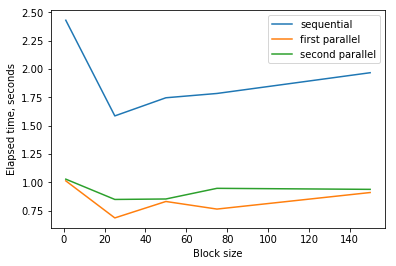

### matrix 450x450

|   block size |   sequential time, s |   parallel first loop time, s |   parallel second loop time, s |
|-------------:|---------------------:|------------------------------:|-------------------------------:|
|            1 |              108.954 |                        44.061 |                         48.69  |
|           25 |               56.74  |                        31.809 |                         32.504 |
|           50 |               63.258 |                        33.871 |                         39.211 |
|           75 |               63.586 |                        31.452 |                         35.585 |
|          150 |               77.018 |                        41.86  |                         40.913 |

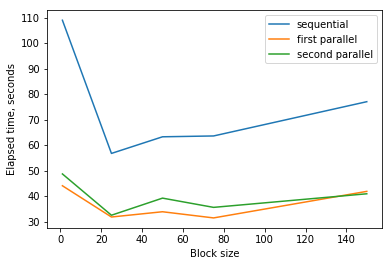

In [38]:
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np

headers = ['block size', 'sequential time, s', 'parallel first loop time, s', 'parallel second loop time, s']
display(Markdown('## results'))

file = open('output.txt', 'r')
for line in file:
    title = 'matrix {}x{}'.format(size, size)
    size, rows = map(int, line.split())
    display(Markdown('### {}'.format(title)))
    table = [file.readline().split() for _ in range(rows)]
    display(Markdown(tabulate(table, headers, tablefmt='pipe')))
    
    data = np.array(table)
    labels = ['sequential', 'first parallel', 'second parallel']
    block_sizes = list(map(int, data[:,0]))
    plt.xlabel('Block size')
    plt.ylabel('Elapsed time, seconds')
    plots = []
    for i in range(1, 4):
        plots.append(plt.plot(block_sizes,  list(map(float, data[:,i])), label=labels[i-1])[0])
    plt.legend(handles=plots)
    plt.show()
    